# 回帰とプロット

In [1]:
import numpy as np
from numpy.random import randn

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


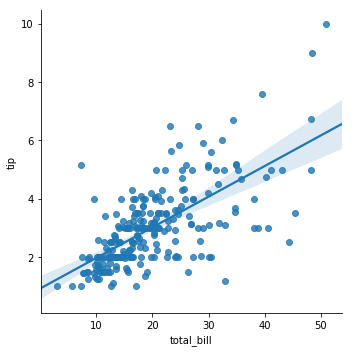

In [4]:
sns.lmplot('total_bill', 'tip', tips)

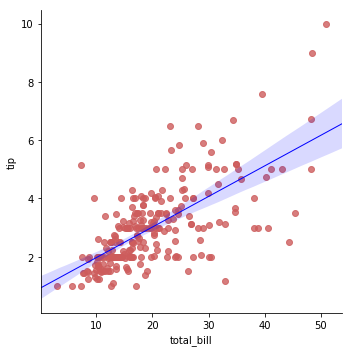

In [5]:
sns.lmplot('total_bill', 'tip', tips, scatter_kws={'marker': 'o', 'color': 'indianred'}, line_kws={'linewidth': 1, 'color': 'blue'})

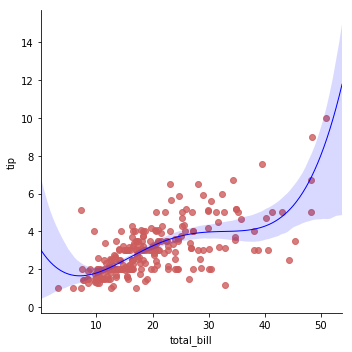

In [10]:
sns.lmplot('total_bill', 'tip', tips, order=4,
           scatter_kws={'marker': 'o', 'color': 'indianred'},
           line_kws={'linewidth': 1, 'color': 'blue'},
          )

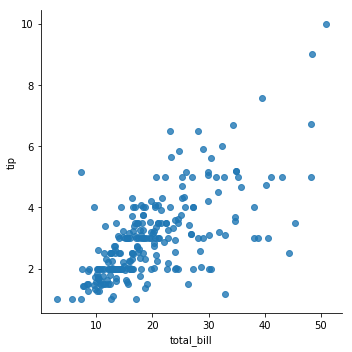

In [11]:
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [12]:
tips['tip_pect'] = 100*(tips['tip'] / tips['total_bill'])

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


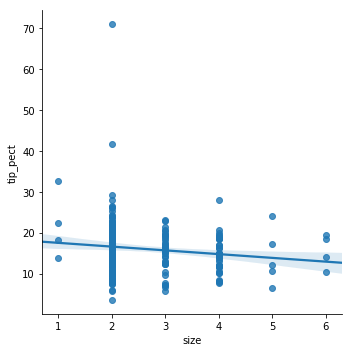

In [15]:
sns.lmplot('size', 'tip_pect', tips)

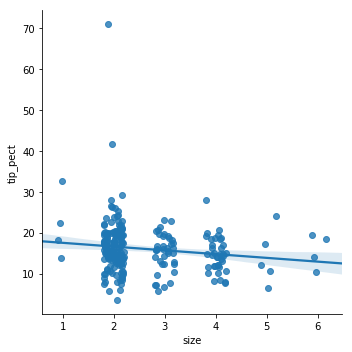

In [18]:
sns.lmplot('size', 'tip_pect', tips, x_jitter=0.2)

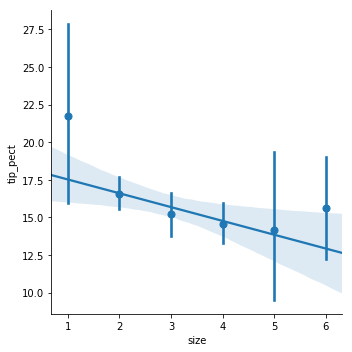

In [21]:
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean)

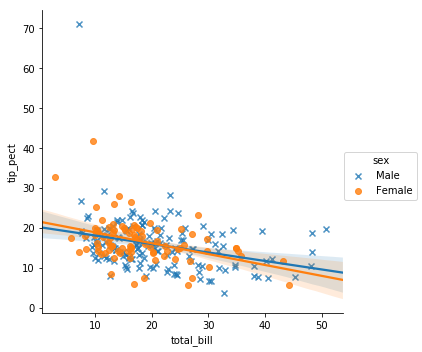

In [22]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

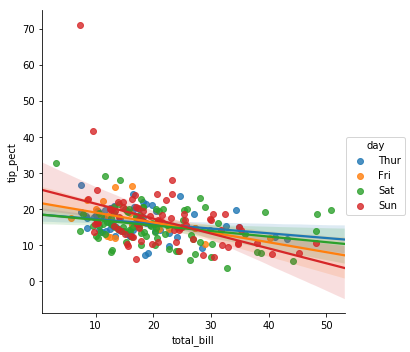

In [23]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

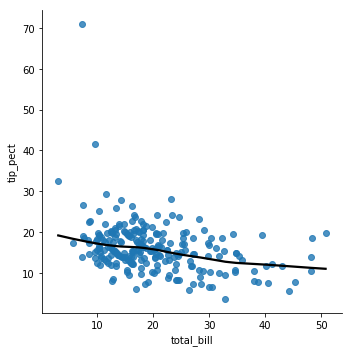

In [25]:
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True, line_kws={'color': 'black'})

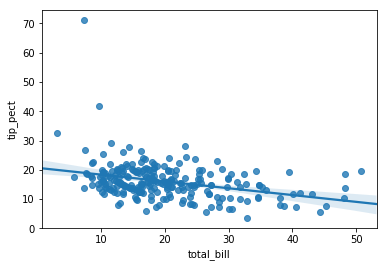

In [26]:
sns.regplot('total_bill', 'tip_pect', tips)

AttributeError: 'DataFrame' object has no attribute 'sort'

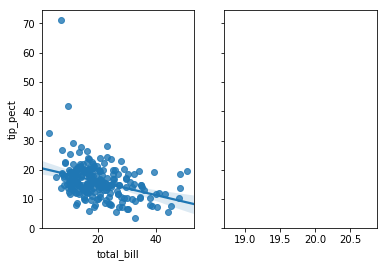

In [27]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)
sns.regplot('total_bill', 'tip_pect', tips, ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips.sort('size'), ax=axis2)